In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime


/Users/dante/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime(2020,1,1)
end = datetime(2020,4,1)


In [44]:
company = ['SOGO']
close_df_sogo = pdr.get_data_yahoo(company, start = start, end=end)['Adj Close']
company = ['BILI']
close_df_bili = pdr.get_data_yahoo(company, start = start,end=end)['Adj Close']
company = ['DAO' ]
close_df_daoo = pdr.get_data_yahoo(company, start = start,end=end)['Adj Close']

company = ['SOGO']
vol_df_sogo = pdr.get_data_yahoo(company, start = start, end=end)['Volume']
company = ['BILI']
vol_df_bili = pdr.get_data_yahoo(company, start = start,end=end)['Volume']
company = ['DAO' ]
vol_df_daoo = pdr.get_data_yahoo(company, start = start,end=end)['Volume']


In [9]:
tech_df = pdr.get_data_yahoo(company, start = start, end=end)

In [10]:
tech_df

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BILI,BILI,BILI,BILI,BILI,BILI
Date,,,,,,
2019-12-31,18.620001,18.620001,19.170000,18.475000,18.549999,2975200
2020-01-02,20.950001,20.950001,21.889999,19.299999,19.469999,12629400
2020-01-03,22.080000,22.080000,22.590000,20.530001,20.549999,11520900
2020-01-06,23.209999,23.209999,23.450001,21.410000,21.459999,10695200
2020-01-07,23.129999,23.129999,23.205000,22.420000,23.170000,7407000
...,...,...,...,...,...,...
2020-03-26,23.040001,23.040001,23.840000,22.660000,23.070000,3560800
2020-03-27,22.110001,22.110001,22.799999,22.049999,22.170000,3315400


In [26]:
df2 = pd.concat([close_df_sogo, close_df_bili])

In [48]:
close_df_sogo['Vol'] = vol_df_sogo['SOGO']

In [49]:
close_df_sogo['Name'] = ['SOGO'] * len(close_df_sogo)

In [50]:
close_df_sogo = close_df_sogo.rename(columns = {'SOGO':'Price'})

In [38]:
del close_df_sogo['BILI']

In [45]:
close_df_bili['Vol'] = vol_df_bili['BILI']
close_df_bili['Name'] = ['BILI'] * len(close_df_bili)
close_df_bili = close_df_bili.rename(columns = {'BILI':'Price'})

close_df_daoo['Vol'] = vol_df_daoo['DAO' ]
close_df_daoo['Name'] = ['DAO' ] * len(close_df_daoo)
close_df_daoo = close_df_daoo.rename(columns = {'DAO' :'Price'})

In [51]:
df_result = pd.concat([close_df_sogo, close_df_bili, close_df_daoo], sort=False)

In [52]:
df_result

Symbols,Price,Vol,Name
Date,,,
2019-12-31,4.550000,952400,SOGO
2020-01-02,4.730000,1156000,SOGO
2020-01-03,4.720000,915400,SOGO
2020-01-06,4.720000,546800,SOGO
2020-01-07,4.770000,394000,SOGO
...,...,...,...
2020-03-26,19.129999,58000,DAO
2020-03-27,18.360001,44900,DAO
2020-03-30,18.430000,67400,DAO


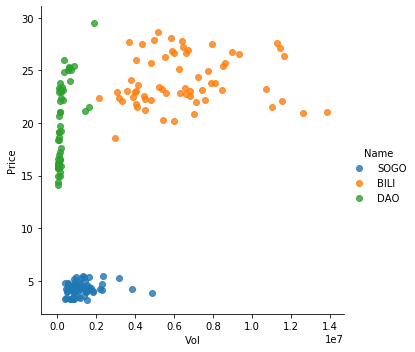

In [54]:
sns.lmplot('Vol', 'Price', df_result, hue = 'Name', fit_reg = False)

In [39]:
close_df_sogo

Symbols,Price,Vol,Name
Date,,,
2019-12-31,4.55,952400,SOGO
2020-01-02,4.73,1156000,SOGO
2020-01-03,4.72,915400,SOGO
2020-01-06,4.72,546800,SOGO
2020-01-07,4.77,394000,SOGO
...,...,...,...
2020-03-26,3.37,841200,SOGO
2020-03-27,3.26,701700,SOGO
2020-03-30,3.28,361700,SOGO
